# **LAB:9 Implement ResNet50 for image classification**

In [ ]:
# Import The Libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Paths
test_Path = '/content/drive/MyDrive/DEEP_LEARNING_LAB/Car_Dataset_LAB9/Test'
train_Path = '/content/drive/MyDrive/DEEP_LEARNING_LAB/Car_Dataset_LAB9/Train'

In [ ]:
# Set Resize variable
IMAGE_SIZE = [224, 224] # This is my desired image size... and also ResNet50 accepts image of 224*224.

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in resnet.layers:
    layer.trainable = False


In [ ]:
# Usefule for getting number of output classes.
# folders = glob('../input/car-brand-images-dataset/Train/*')
folders = glob(train_Path + '/*')
folders

['/content/drive/MyDrive/DEEP_LEARNING_LAB/Car_Dataset_LAB9/Train/mercedes',
 '/content/drive/MyDrive/DEEP_LEARNING_LAB/Car_Dataset_LAB9/Train/audi',
 '/content/drive/MyDrive/DEEP_LEARNING_LAB/Car_Dataset_LAB9/Train/lamborghini']

In [ ]:
car_label = ['mercedes', 'audi', 'lamborghini']

In [ ]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
# Create a model Object
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 64 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 58 images belonging to 3 classes.


In [ ]:
# Fir the model.

history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-36-7081edc35510>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
2/2 [==============================] - 27s 21s/step - loss: 1.3161 - accuracy: 0.5938 - val_loss: 1.1445 - val_accuracy: 0.6379
Epoch 2/20
2/2 [==============================] - 34s 28s/step - loss: 0.8382 - accuracy: 0.6562 - val_loss: 1.0783 - val_accuracy: 0.4655
Epoch 3/20
2/2 [==============================] - 34s 28s/step - loss: 0.7859 - accuracy: 0.5938 - val_loss: 1.3477 - val_accuracy: 0.4483
Epoch 4/20
2/2 [==============================] - 34s 26s/step - loss: 0.6348 - accuracy: 0.7188 - val_loss: 0.8969 - val_accuracy: 0.5862
Epoch 5/20
2/2 [==============================] - 34s 27s/step - loss: 0.7697 - accuracy: 0.6719 - val_loss: 1.0927 - val_accuracy: 0.6379
Epoch 6/20
2/2 [==============================] - 26s 20s/step - loss: 0.8131 - accuracy: 0.7031 - val_loss: 0.8367 - val_accuracy: 0.6379
Epoch 7/20
2/2 [==============================] - 34s 27s/step - loss: 0.4674 - accuracy: 0.7812 - val_loss: 1.1785 - val_accuracy: 0.4483
Epoch 8/20
2/2 [===========

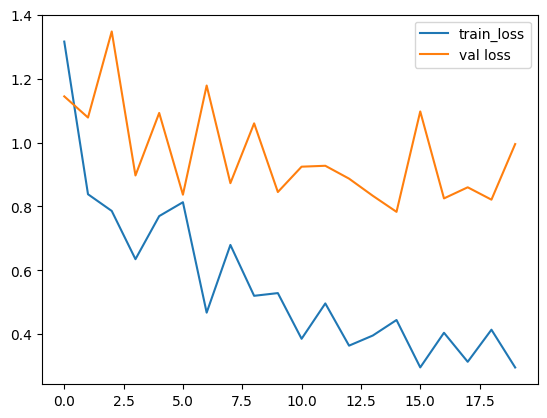

In [ ]:
# Plot the Loss

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')